
# 📘 Decision Boundary in KNN (Theory + Voronoi + Plot)

##  What is a Decision Boundary?
A **decision boundary** is a line/curve/surface that separates different classes in the feature space.  
For any classifier, the boundary indicates *where the model changes its predicted label*.

In **K-Nearest Neighbors (KNN)**:
- The decision boundary depends completely on the **training data layout**.
- It is **non-linear**, often **irregular**.
- It adjusts based on the majority of the *K nearest neighbors*.

---

##  Voronoi Diagram (for K=1)
A **Voronoi diagram** partitions the feature space so that:
- Every region contains points closest to a specific training point.
- For **1-NN**, the decision boundary lies on the edges of Voronoi cells.

### Voronoi Diagram 

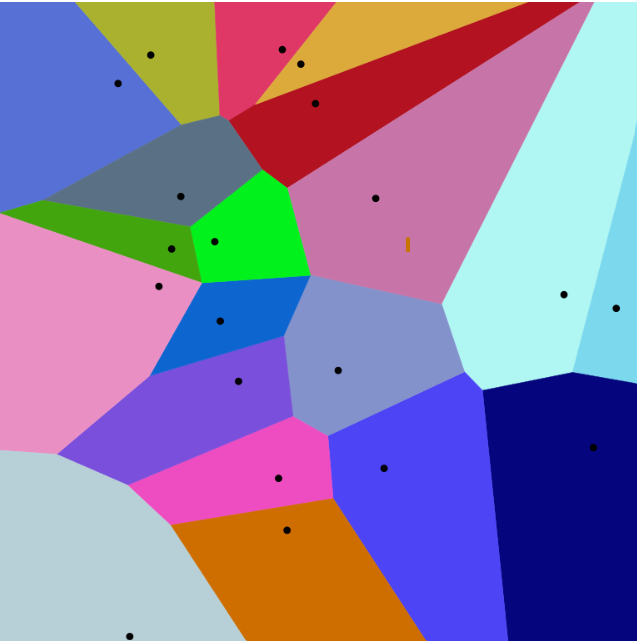

---

## Steps to Plot Decision Boundary for KNN

1. **Generate/Load a 2D dataset**
2. **Train KNN classifier**
3. **Create meshgrid covering feature space**
4. **Predict for each grid point**
5. **Plot contour (decision boundary) + scatter points**

---


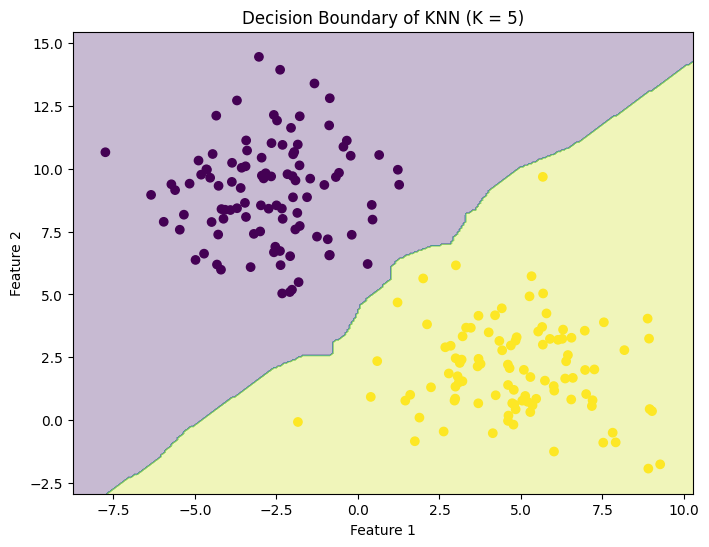

In [1]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier

# 1. Generate dataset
X, y = make_blobs(n_samples=200, centers=2, random_state=42, cluster_std=2.0)

# 2. Train model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)

# 3. Meshgrid
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 300),
    np.linspace(y_min, y_max, 300)
)

# 4. Predict
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# 5. Plot
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title("Decision Boundary of KNN (K = 5)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()
